**Question 1**

(a) Create a 2-by-3 array of subplots. Fix k = 3 and instantiate an array N = [5, 10, 30] and a variable
size = 100, 000
.
(b) Using a for loop, for each value n in N sample a size × n array of samples from the distribution t(
k)
(c) Compute the sample average along each row (i.e. you should get size sample averages), and plot
their histogram in a subp
lot.
(d) Over the histogram (i.e. in the same subplot), plot the approximate density of the distribution of
sample averages which is given by the CLT as described 
above.
(e) In a separate subplot, display the QQ plot of the sample means versus their approximate distributionBriefly justify your answer.

**Answer:- Explanation of the codes and graphs plotted**
The code generates samples from the Student's t(3) distribution for different values of N (5, 10, 30)
It calculates the sample means and plots their histograms along with the CLT approximation
The QQ plots are created to compare the distribution of sample means with normal distribution.
From the graphs plotted below we can observe that, the points on the QQ plotted for N=30 plot closely follow the reference line, it indicates that the distribution of sample means is well-approximated by normal distribution for N  = 30 sampled **Independently and Identically via np.random.standard_t method** where the QQ plot shows a good normal distribution fit.
In this  case as N increases, the fit improves, and for a sufficiently large N, the CLT approximation becomes accurate. 
In conclusion this phenomenon follows the **central limit theorem**. The same thing can be observed from plotted histogram with pdf's as well, for N=30 the pdf closely resembles normal distribution. 
In the QQ plots plotted we can also see that as the value of N increases the skewness of the plot decreases by observing the tails. 

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import t

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


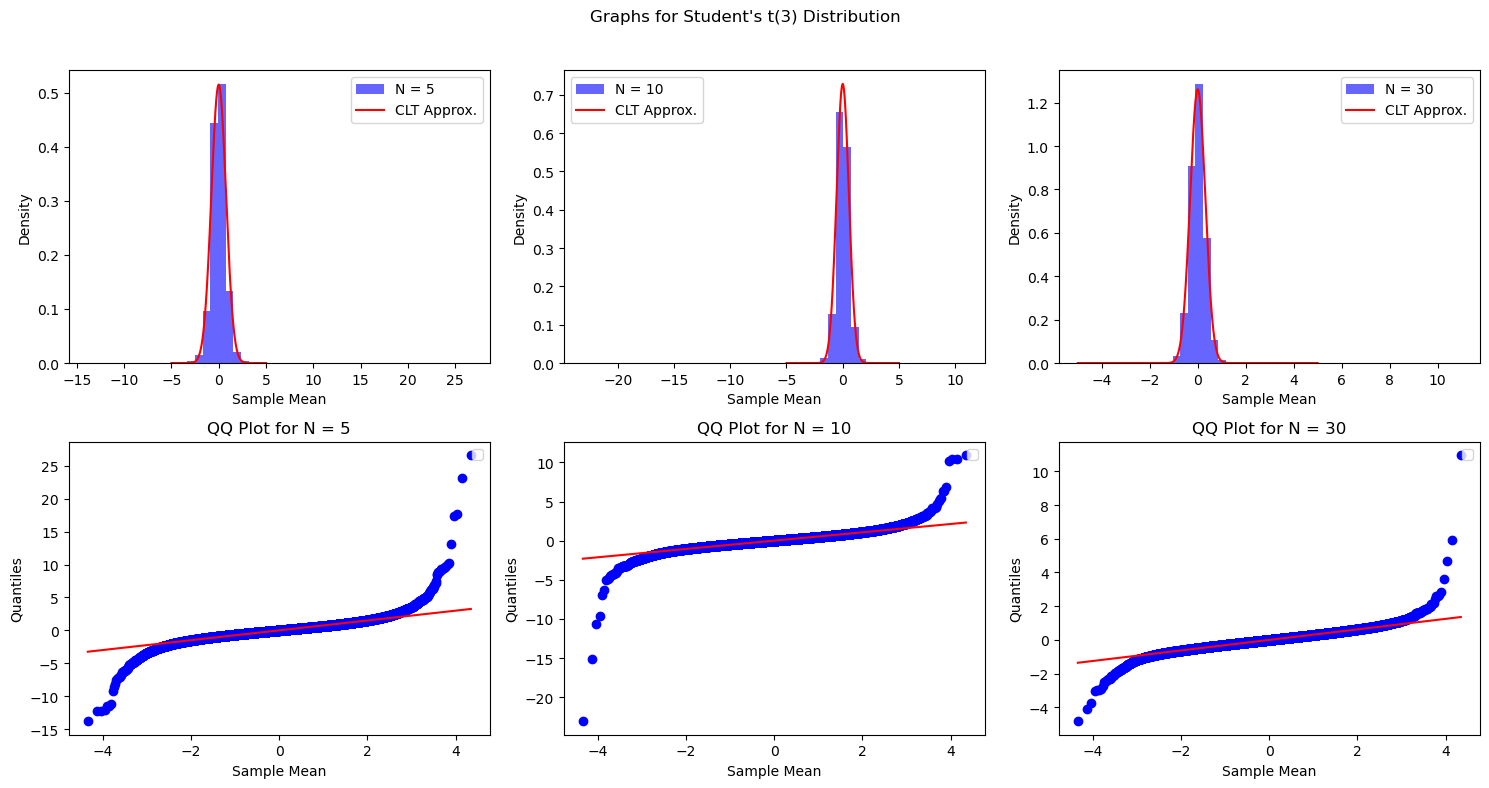

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

# Set the random seed for reproducibility
np.random.seed(42)

# Function to calculate the variance of the t-distribution
def t_distribution_variance(k, N):
    return k / ((k - 2) * N)

# Parameters
k = 3
N_values = [5, 10, 30]
size = 100000

# Create a 2-by-3 array of subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('Graphs for Student\'s t(3) Distribution')

for i, N in enumerate(N_values):
    # Sample a size × n array of samples from the t-distribution
    samples = np.random.standard_t(df=k, size=(size, N))

    # Compute the sample average along each row
    sample_means = np.mean(samples, axis=1)

    # Plot histogram of sample means
    axes[0, i].hist(sample_means, bins=50, density=True, alpha=0.6, color='blue', label=f'N = {N}')

    # Plot the approximate density of the distribution of sample averages using CLT
    x = np.linspace(-5, 5, 1000)
    clt_approx_density = stats.norm.pdf(x, loc=0, scale=np.sqrt(t_distribution_variance(k, N)))
    axes[0, i].plot(x, clt_approx_density, 'r', label='CLT Approx.')

    # QQ plot of sample means versus their approximate distribution
    stats.probplot(sample_means, dist=stats.norm, plot=axes[1, i])
    axes[1, i].set_title(f'QQ Plot for N = {N}')

# Set labels and legends
for i in range(2):
    for j in range(3):
        axes[i, j].set_xlabel('Sample Mean')
        axes[i, j].set_ylabel('Density' if i == 0 else 'Quantiles')
        axes[i, j].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [46]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


**Ques2 : Download the Dow Jones Industrial Average from Stooq using the following code. Do NOT
make any local copies of your data!**

**NOTE** : install pandas_datareader (if not installed)

In [47]:
import pandas_datareader.data as web
data = web.DataReader('^DJI' ,'stooq',start='1995/01/01',end='2023/11/14' )
data = data.reset_index()
dates = data["Date"]
dow = data ["Close"].to_numpy()

**(a) Plot this times series.**

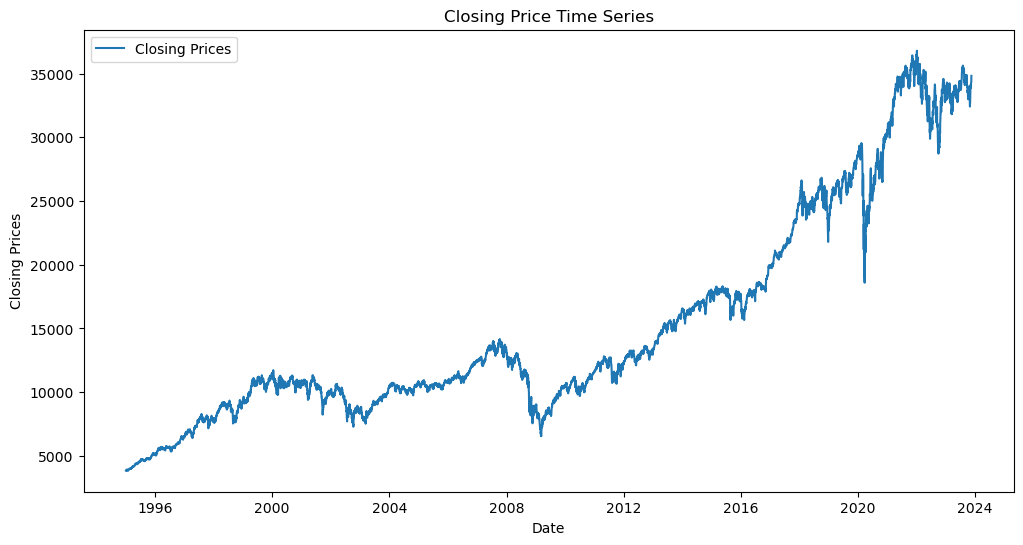

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# (a) Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(dates, dow, label='Closing Prices')
plt.title('Closing Price Time Series')
plt.xlabel('Date')
plt.ylabel('Closing Prices')
plt.legend()
plt.show()


**(b) Compute the time series of (percentage) daily returns using the formula**

In [49]:
# (b) Compute percentage daily returns
data['Return'] = data['Close'].pct_change() * 100

The above function 'pct_change' applies the formulae **$Return_t = 100 * (close_t/close_{t-1} - 1)$**

**(c) Compute the length-n sample averages of daily returns, starting at the first datapoint, for every
n ≥ 100. Thus the first datapoint in this time series will be the average of the first 100 daily returns,
the second will be the average of the first 101 daily returns, etc., and the last will be the average of
all daily returns. Plot this timeseries. Does it look like it obeys the weak Law of Large Numbers? If
yes explain why, if not explain why this might be the case**

**Explanation:-** The weak law of large numbers states that with a sufficiently large sample size, the sample mean is likely to be close to the population mean.
In the graph plotted below, I have took the mean of all the samples, taking my first as the average of 100 daily returns and then 101 daily returns till the length of our dataset. From the graph plotted below we can see that as the numbers of samples increases our sample averages are getting close to the reference line which is our actual mean of the dataset. Hence we can say that it is obeying the weak law of large numbers

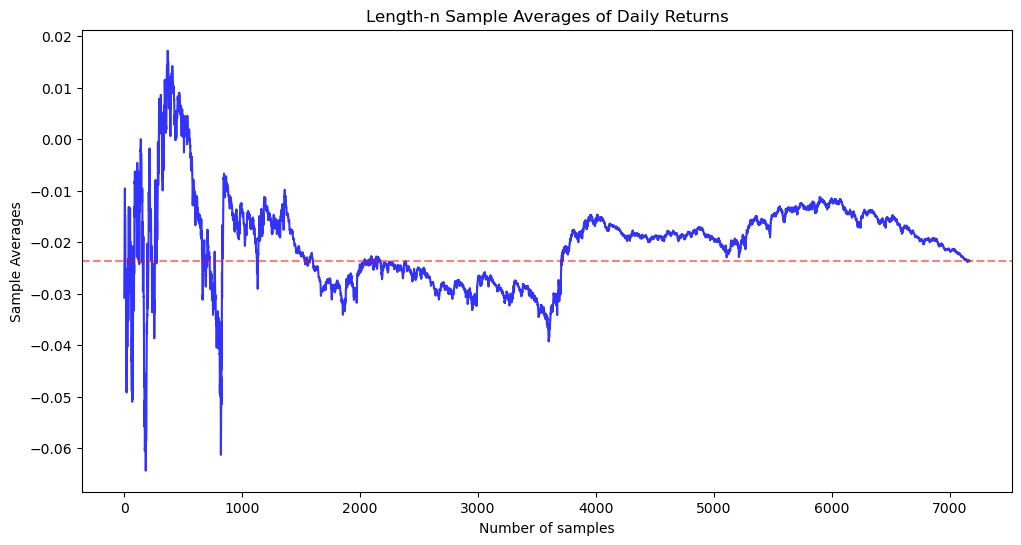

In [50]:
# (c) Compute length-n sample averages of daily returns for every n >= 100
n_values = range(100, len(data))
sample_averages = [data['Return'][:n].mean() for n in n_values]

# Plot the sample averages
plt.figure(figsize=(12, 6))
plt.plot(sample_averages, alpha=0.8, color='blue')
plt.axhline(np.mean(data['Return']) ,c='r', linestyle='--', alpha = 0.5)
plt.title('Length-n Sample Averages of Daily Returns')
plt.xlabel('Number of samples')
plt.ylabel('Sample Averages')
plt.show()

**(d) Compute the length-100 rolling averages of daily returns. Plot a histogram of these sample averages.
Repeat with length-400 rolling averages. Does it look like these obey the Central Limit Theorem? If
yes explain why, if not explain why this might be the case.**

**Answer**: - Even if the original distribution of the random variables is not normal, the distribution of the sum or average becomes approximately normal as the sample size (
n) increas for **independently identically distributed samples**e In below code I am plotting the graph of rolling averages for lengths of 100 and 400 respectively. We can see from the below graph that rolling averages for the length of 400 the graph seems to be following the normal distribution more closely than length of 100, which is evident from the QQ plots plotted. The reason for this is the increased number of samples in in each rolling window due to the increased length, due to the window size, sample size for both lengths are identically distributed. As the sample size for window size of 400 is greater than that of window size 100, hence it is obeying the **Central Limit Theorem**s.

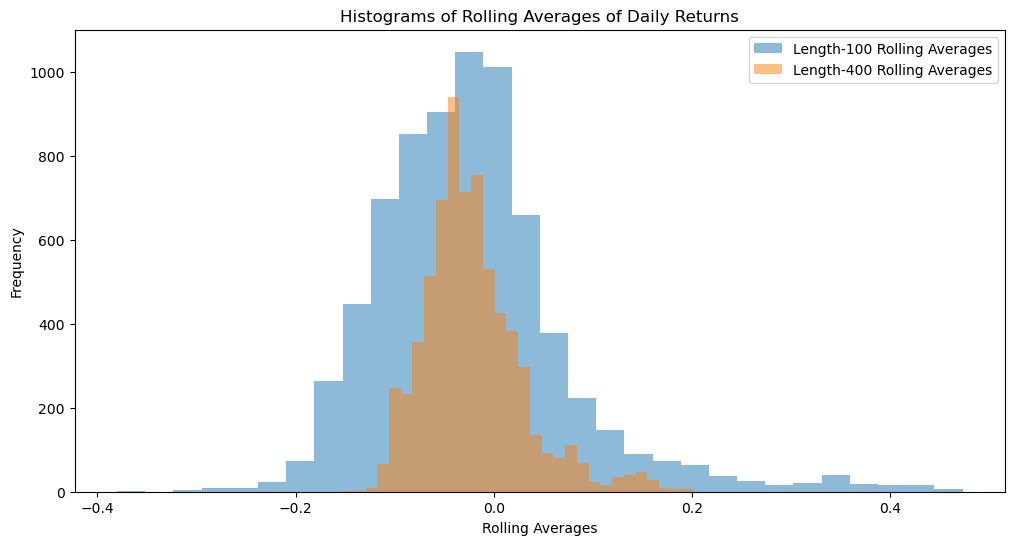

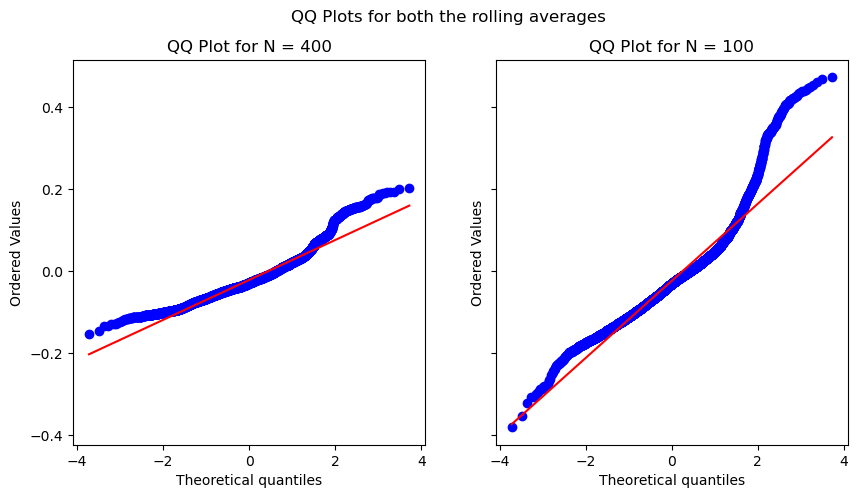

In [51]:
# (d) Compute length-100 and length-400 rolling averages of daily returns
rolling_avg_100 = data['Return'].rolling(100).mean().dropna()
rolling_avg_400 = data['Return'].rolling(400).mean().dropna()

# Plot histograms of rolling averages
plt.figure(figsize=(12, 6))
plt.hist(rolling_avg_100, bins=30, alpha=0.5, label='Length-100 Rolling Averages')
plt.hist(rolling_avg_400, bins=30, alpha=0.5, label='Length-400 Rolling Averages')
plt.title('Histograms of Rolling Averages of Daily Returns')
plt.xlabel('Rolling Averages')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#Plot the QQ plotes for rolling averages
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey= True)
fig.suptitle('QQ Plots for both the rolling averages')
stats.probplot(rolling_avg_100, dist=stats.norm, plot=axes[1])
axes[1].set_title(f'QQ Plot for N = 100')
stats.probplot(rolling_avg_400, dist=stats.norm, plot=axes[0])
axes[0].set_title(f'QQ Plot for N = 400')
plt.show()

**(e) Compute the sample mean, variance, skewness and kurtosis of the daily returns. Based on this
information, suggest which family of distributions might model these daily returns. Briefly justify
your choic**.

**Answer** From the values of printed below we can see that the skewness for daily returns is **>0.5** this suggest that it is rightly skewed but in the **Standard Normal Distribution** no skewness is present. Further higher value of kurtosis indicates the heavier tails as compared to the **Std Normal Distribution**, these tells suggests that distribution may be modelled by the family of **t-distributions such as student's t-distribution** for low **degree of freedom values**, hence I will try to model these daily returns by this distribution 

In [52]:
# (e) Compute sample mean, variance, skewness, and kurtosis of daily returns
mean_return = data['Return'].mean()
variance_return = data['Return'].var()
skewness_return = data['Return'].skew()
kurtosis_return = data['Return'].kurt()

# Display statistics
print(f'Sample Mean of Daily Returns: {mean_return}')
print(f'Variance of Daily Returns: {variance_return}')
print(f'Skewness of Daily Returns: {skewness_return}')
print(f'Kurtosis of Daily Returns: {kurtosis_return}')

Sample Mean of Daily Returns: -0.0237229554101248
Variance of Daily Returns: 1.3282496804110582
Skewness of Daily Returns: 0.6481969061545365
Kurtosis of Daily Returns: 12.987573014493176


**(f)Implement the function which needs to be maximized (this was explained in the lectures). The
parameter(s) which you are trying to estimate must of course be inputs to this function.**

Implemented a function which takes 4 parameters, 

1. data percentage change of daily returns
2. Degree of freedom we have taken it as 3
3. Mean acting as Loc
4. std deviationacting as scale

In [53]:
from scipy.optimize import minimize
from scipy.stats import t
import seaborn as sns
# dropping all the na values and storing only numerical values i.e. actual returns in returns array
returns = data['Return'].dropna()

# (f) Implement the negative log-likelihood function
def neg_log_likelihood(params, data):
    # Extract parameters
    # Modify this based on the number of parameters in your chosen distribution
    param1, param2, param3 = params
    
    # Calculate negative log-likelihood
    nll = -np.sum(t.logpdf(data,param1,param2,param3))
    return nll

**(f)Using the minimize function from scipy.optimize, find the optimal parameters. (Hint: maximizing f(x) is the same thing as minimizing −f(x)). You can use any of the actual minimization methods, as long as it gives you a sensible answer.**

**Explanation** In the below function I have used the default minimze method and printed its output and plotted the graph, as we can see from values printed below the minimize function is giving us the optimized values for all the 3 parameters used, and from the graph it is evident that this distribution is almost fitting our plotted daily returns

[ 2.85349092 -0.06273679  0.68881395]


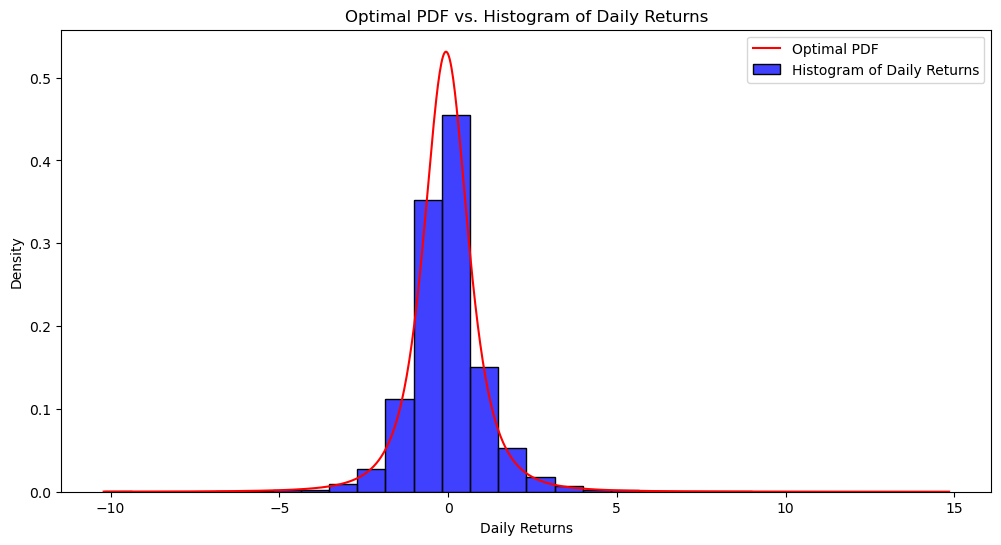

In [54]:
# For a t-distribution
initial_guess_mean_t = mean_return
initial_guess_std_d = np.sqrt(variance_return)
initial_guess_df = 3
# Initial guess for parameters
initial_params = np.array([initial_guess_df,initial_guess_mean_t, initial_guess_std_d])

# Optimize the negative log-likelihood
optimal_params = minimize(neg_log_likelihood, initial_params, args=(returns,))


# Extract optimal parameters
optimal_param1, optimal_param2,  optimal_param3 = optimal_params.x
print(optimal_params.x)
# Plot the PDF of the optimal distribution against a histogram
plt.figure(figsize=(12, 6))
sns.histplot(returns, bins=30, stat = 'density' ,color='blue', label='Histogram of Daily Returns')
x_values = np.linspace(returns.min(), returns.max(), 1000)
plt.plot(x_values, t.pdf(x_values, df = optimal_param1, loc= optimal_param2, scale = optimal_param3),c='r', label='Optimal PDF')
plt.title('Optimal PDF vs. Histogram of Daily Returns')
plt.xlabel('Daily Returns')
plt.ylabel('Density')
plt.legend()
plt.show()

**(g) Check the results you obtained in the previous step by comparing it with the parameters you obtain
from scipy’s fit function. Again, plot the PDF of the distribution with these parameters against a
histogram of the daily returns.**

**Explanation** In the function below I have fitted our dataset to t-distribution and plotted the graph for it. From the values printed below for both fitted values and minimized values we can see that both are returning the values that are identical upto 3-4 decimal points hence we can see practically no difference between both the graphs plotted

(2.853495932310387, -0.06274107728130038, 0.6888110968432781)


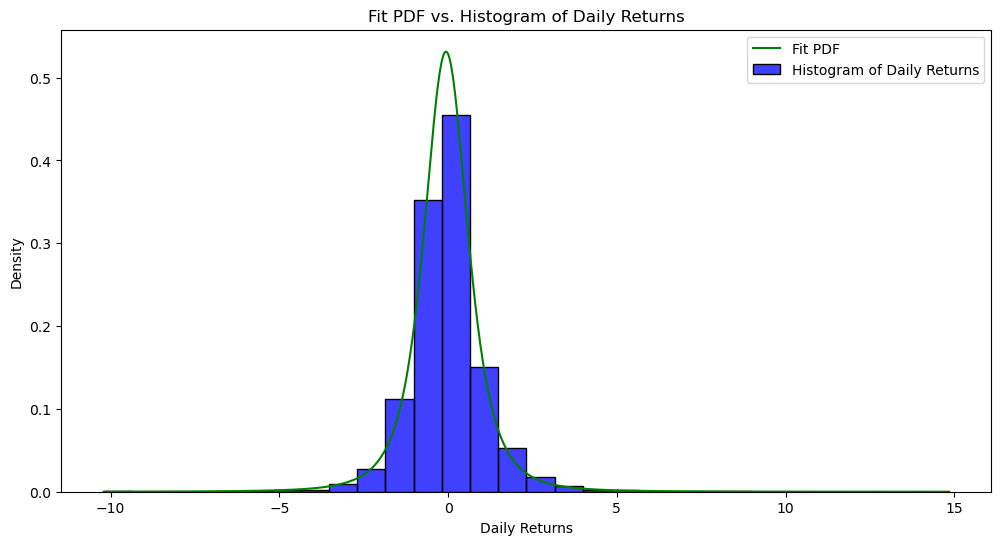

In [55]:
# (g) Check results with scipy's fit function
fit_params = t.fit(returns)
print(fit_params)
# Extract parameters from fit
fit_param1, fit_param2, fit_param3 = fit_params

# Plot the PDF of the fitted distribution against a histogram
plt.figure(figsize=(12, 6))
sns.histplot(returns, bins=30,stat = 'density', color='blue', label='Histogram of Daily Returns')
pdf = t.pdf(x_values, fit_param1, fit_param2, fit_param3)
#pdf1 = t.pdf(x_values, df = optimal_param1, loc= optimal_param2, scale = optimal_param3)
plt.plot(x_values, pdf, label='Fit PDF', c='g')
#plt.plot(x_values, pdf1, label='MLE PDF', c='r')
plt.title('Fit PDF vs. Histogram of Daily Returns')
plt.xlabel('Daily Returns')
plt.ylabel('Density')
plt.legend()
plt.show()

In [56]:
print('Optimal Params obtained by Minimize function ',optimal_params.x)

Optimal Params obtained by Minimize function  [ 2.85349092 -0.06273679  0.68881395]


In [57]:
print('Optimal Params obtained by after fitting the t-distribution ',fit_params)

Optimal Params obtained by after fitting the t-distribution  (2.853495932310387, -0.06274107728130038, 0.6888110968432781)


**NOTE**
Explanation mentioned above.